In [1]:
%matplotlib inline
#
from LRGSG_package.shared import *
from LRGSG_package.config.const import *
from LRGSG_package.LRGSG import move_to_rootf, Lattice2D
#
move_to_rootf(print_tf=True)
plt.style.use("ipynb/nb_plotsheet.mplstyle")

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [5]:
sides = [8, 16, 32, 48, 64]
datpath = "phase_transition_l2d/"
geometry_cell_dict = {'squared': L2D_RAND_CELL_LIST,
                    'triangular': L2D_RAND_CELL_LIST,
                    'hexagonal': L2D_RAND_CELL_LIST}

In [6]:
def read_files_to_2d_array(folder_path, keyword):
    """
    Read files from a folder that contain a specific keyword in their name.
    Each file's contents are appended to a 2D array.
    
    Args:
    - folder_path: Path to the folder containing the files.
    - keyword: String that must be part of the file's name to be processed.
    
    Returns:
    - A 2D list containing the contents of each processed file.
    """
    # Initialize the 2D array
    data_2d_array = []
    
    # List all files in the given folder
    for file_name in os.listdir(folder_path):
        # Check if the file name contains the keyword
        if keyword in file_name.split('_'):
            # Construct full file path
            file_path = os.path.join(folder_path, file_name)
            # Open and read the file
            with open(file_path, 'r') as file:
                # Assuming each line of a file represents a separate data entry
                file_contents = [line.strip() for line in file.readlines()]
                data_2d_array.append(file_contents)
    
    return data_2d_array

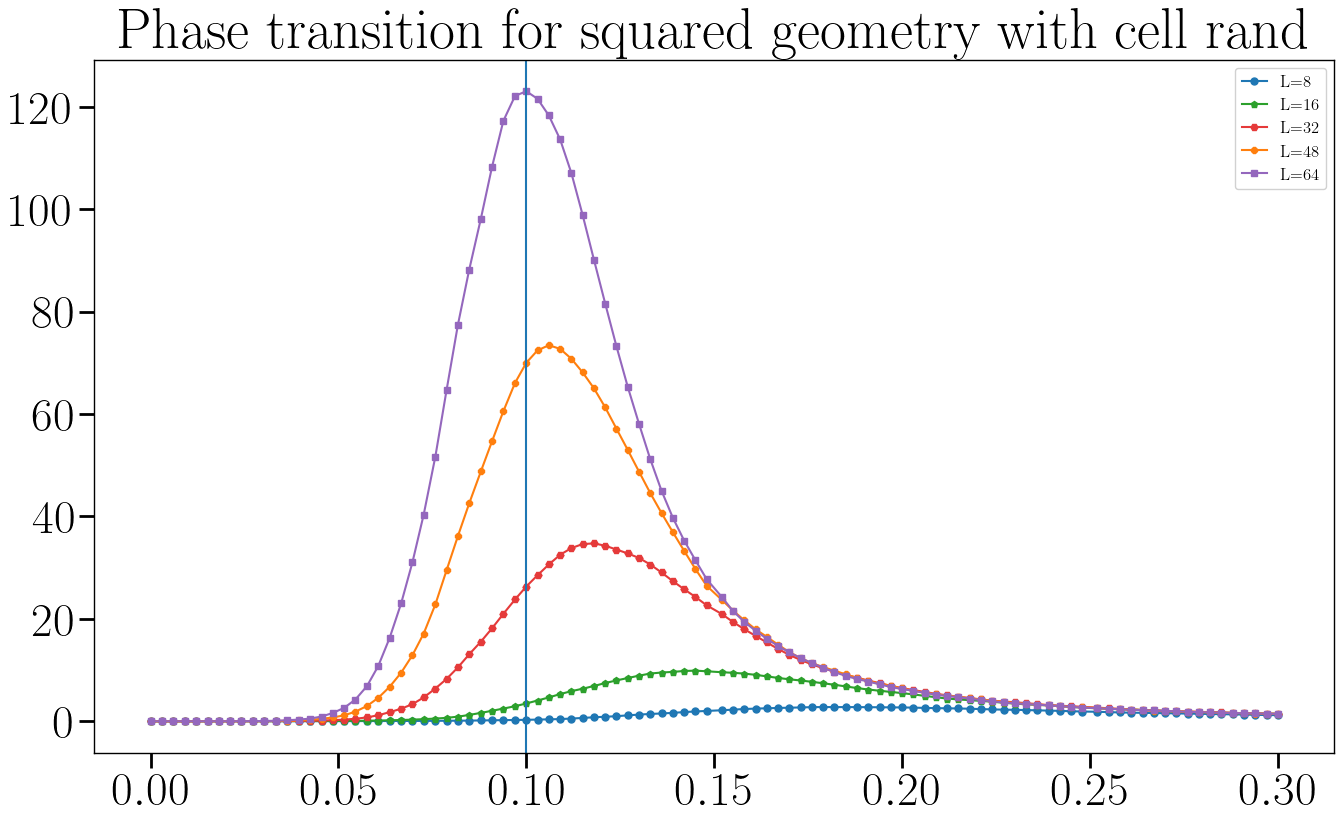

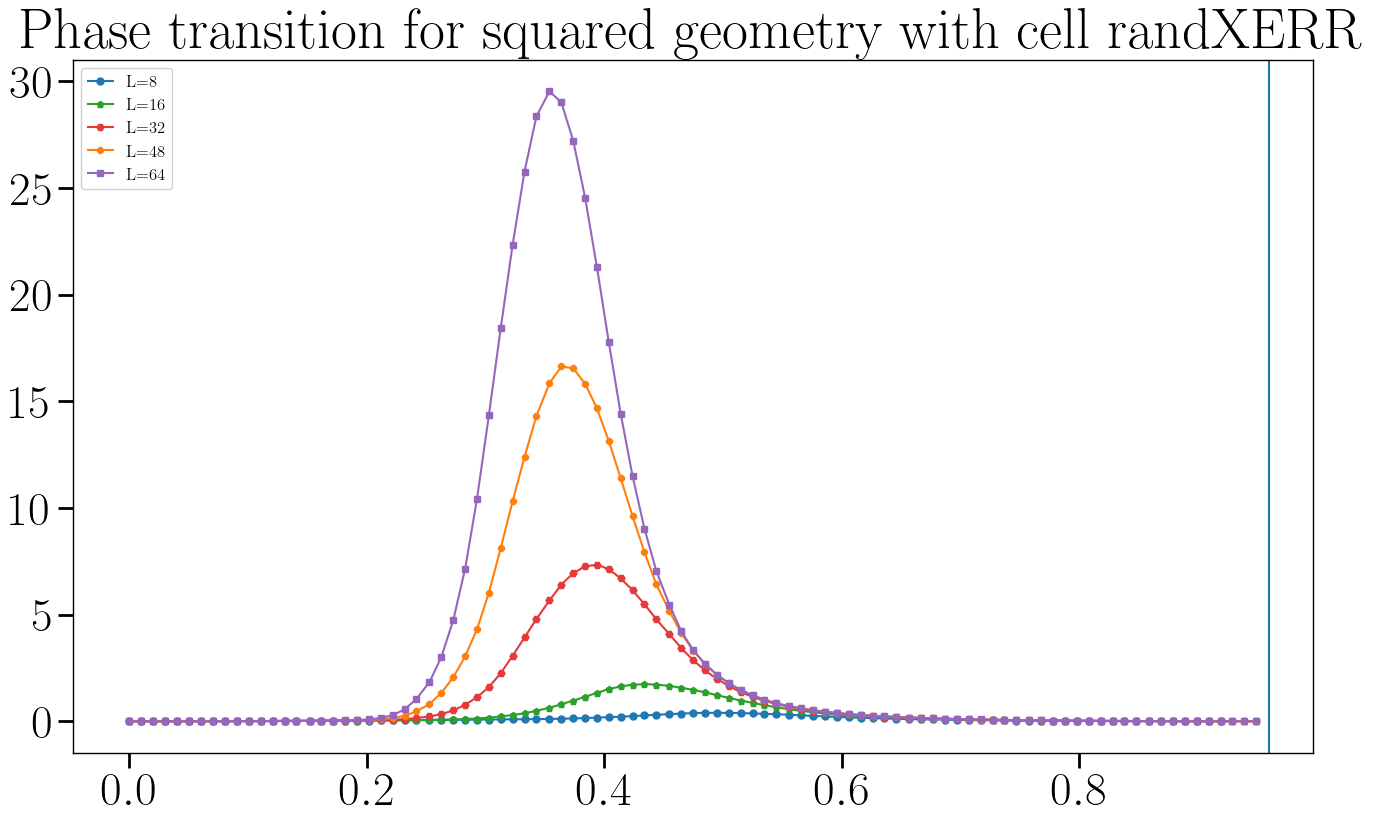

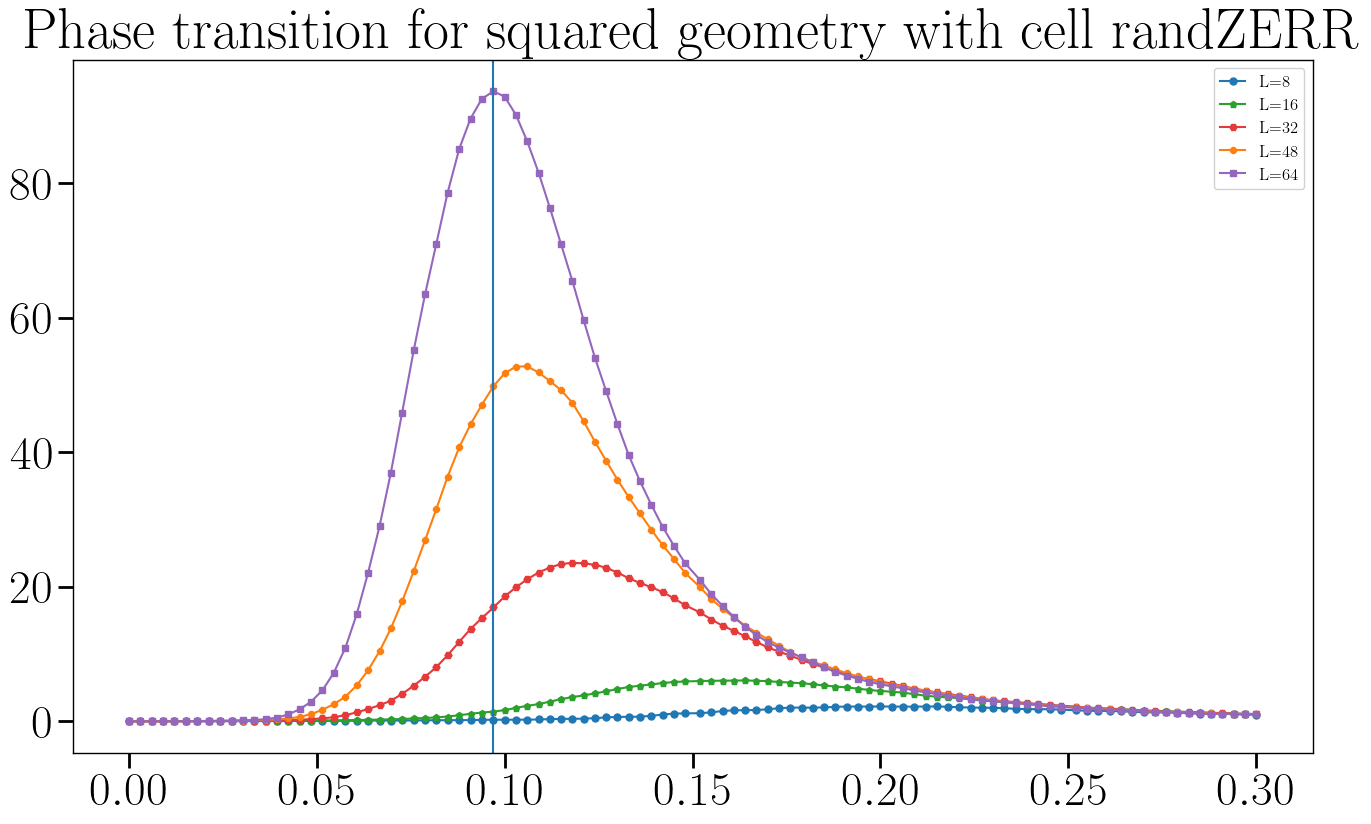

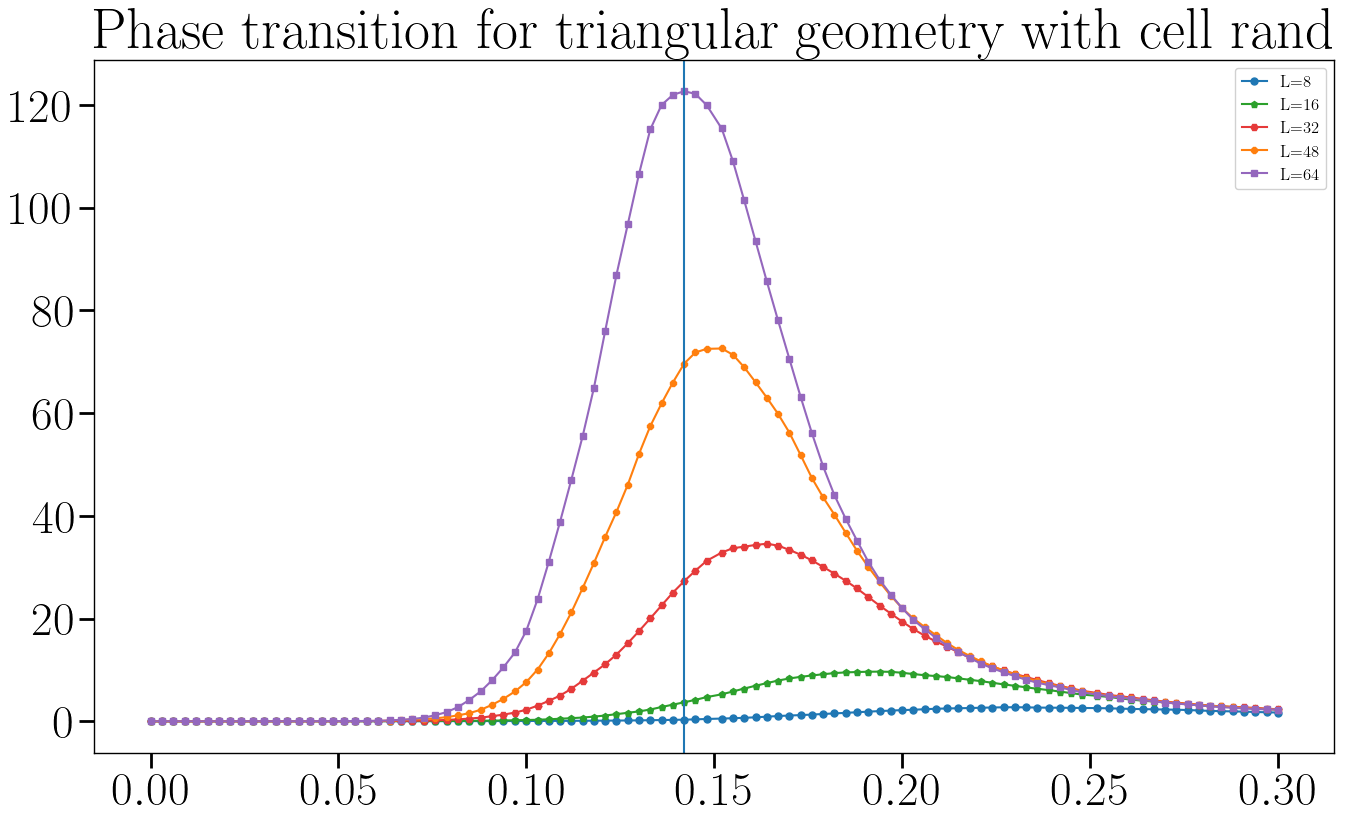

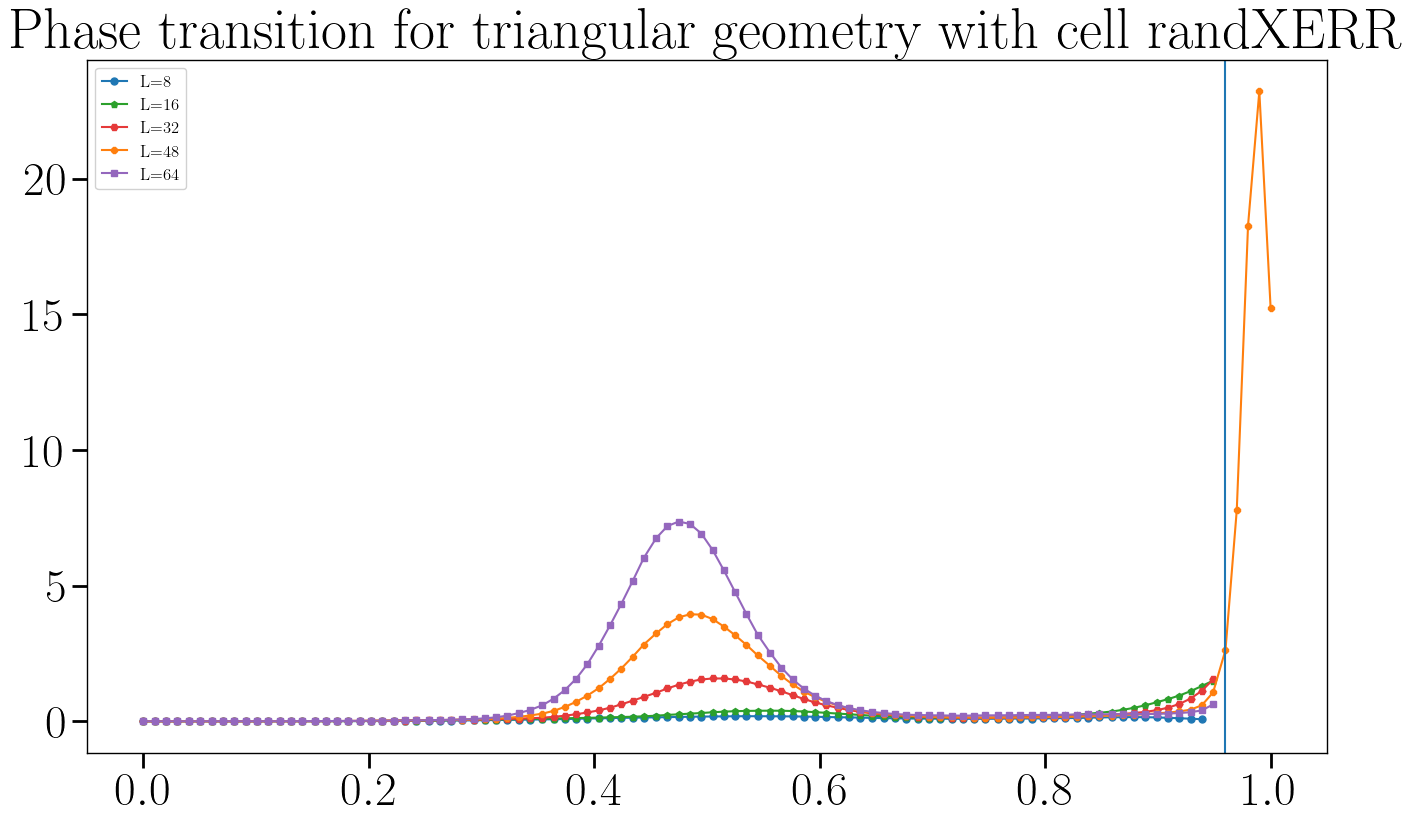

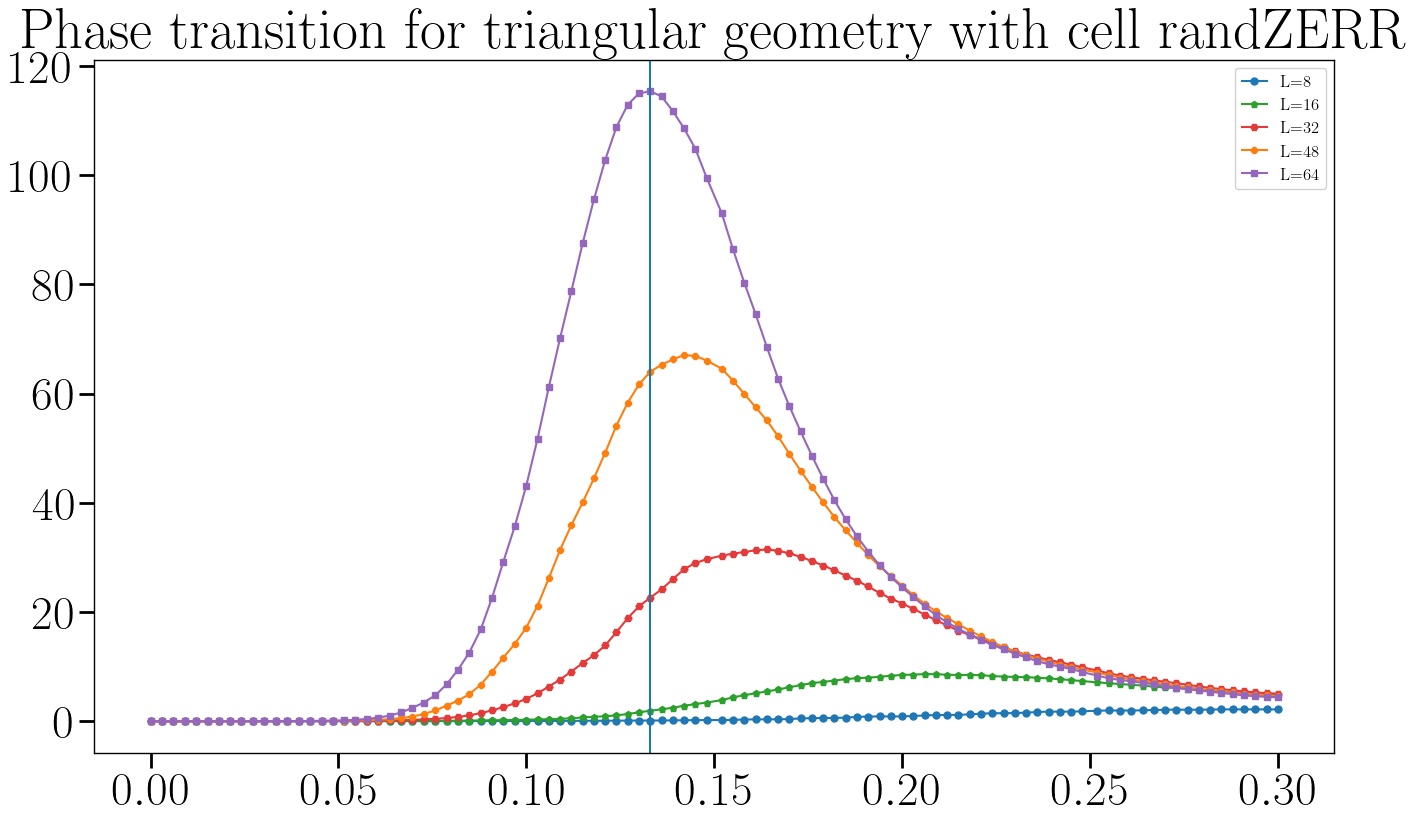

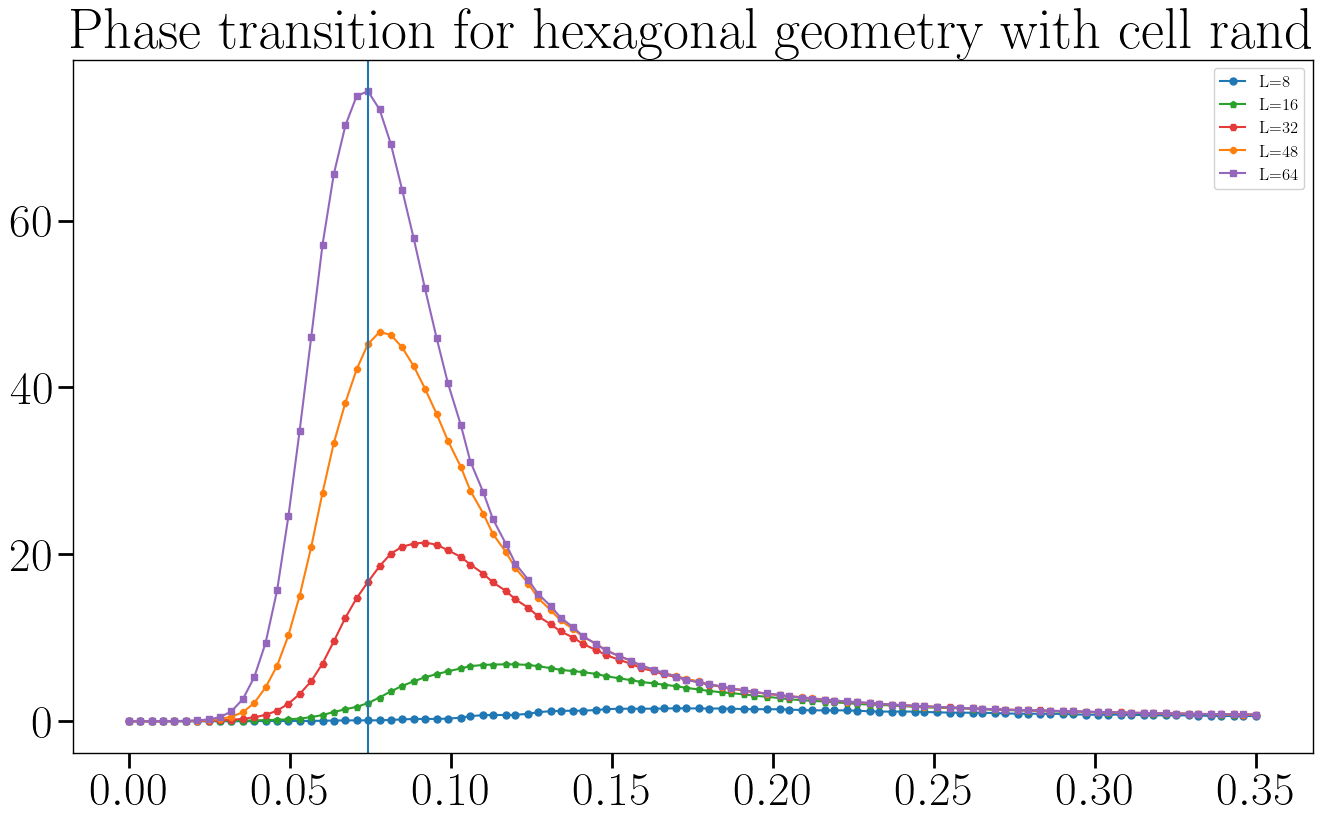

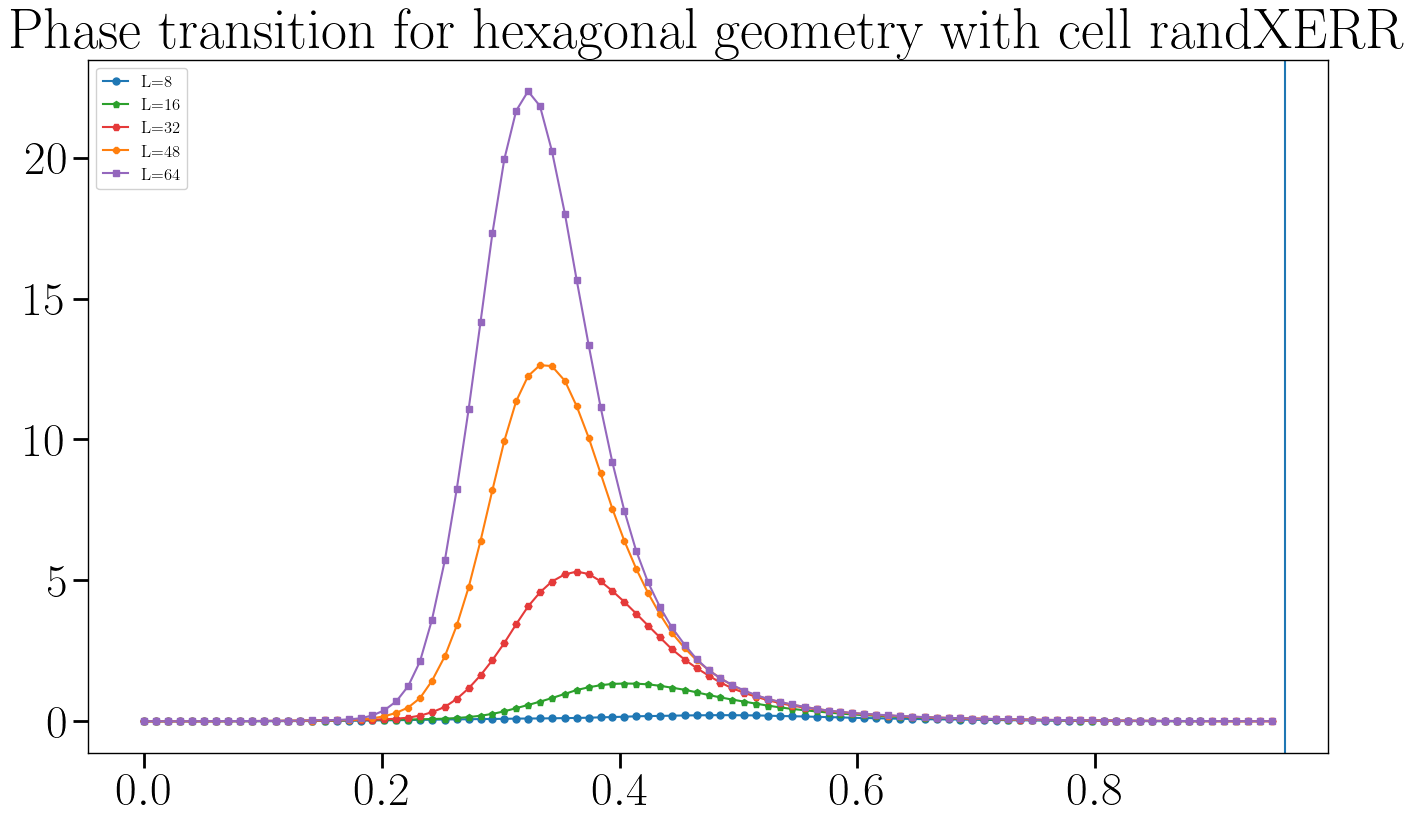

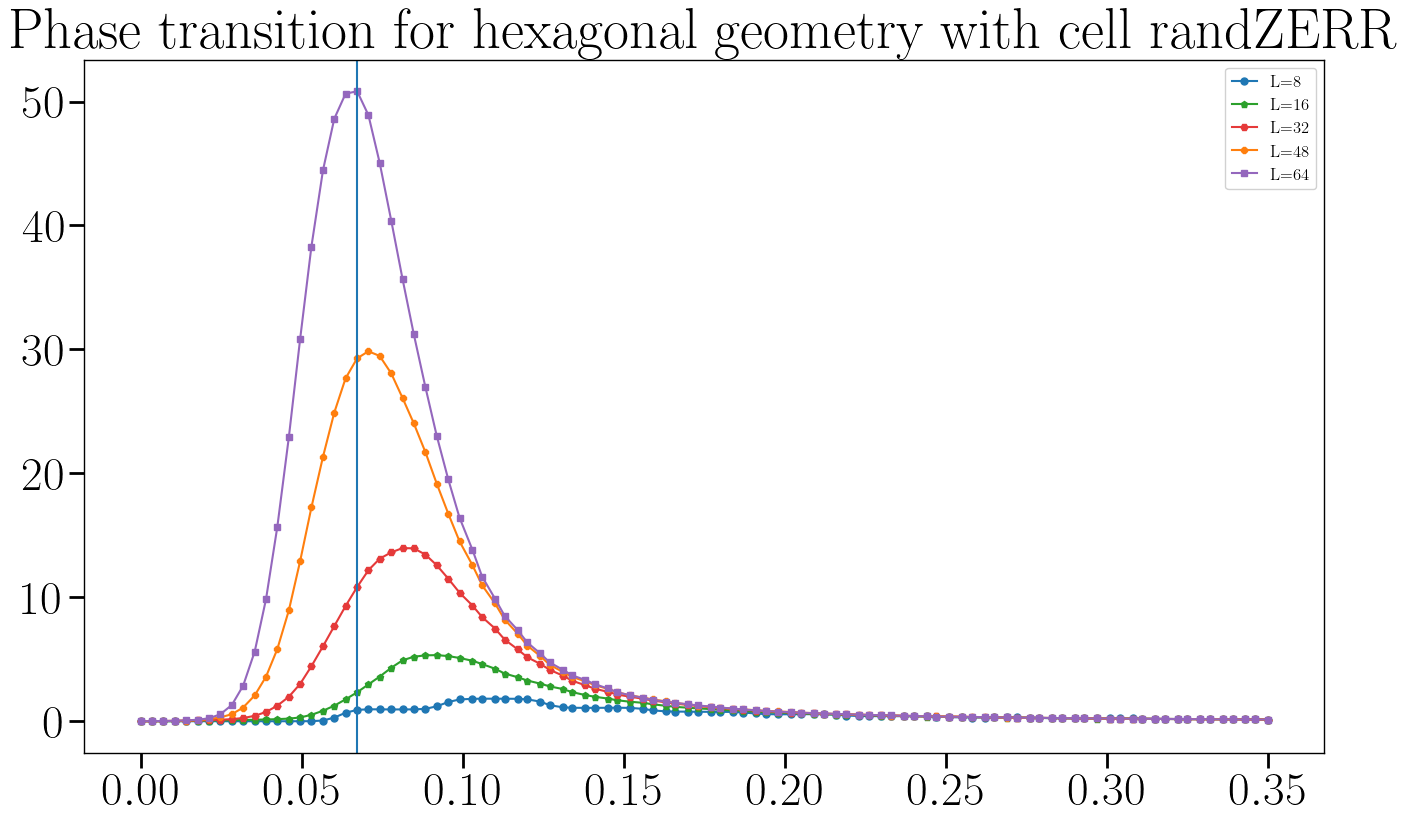

In [9]:
for geo,cells in geometry_cell_dict.items():
    for cell in cells:
        plt.close('all')
        plt.figure()
        plt.title(f"Phase transition for {geo} geometry with cell {cell}")
        for L in sides:
            l = Lattice2D(L, geo=geo, initNwDict=True, with_positions=False, sgpath=datpath)
            data_2d_array = np.array(read_files_to_2d_array(l.phtrapath, cell)).astype(float)
            data_2d_array = data_2d_array[np.argsort(data_2d_array[:, 0])]
            plt.plot(data_2d_array[:, 0], gaussian_filter(data_2d_array[:, 7]*l.N,sigma=1), label=f"L={L}")
        plt.axvline(x=data_2d_array[np.argmax( gaussian_filter(data_2d_array[:, 7]*l.N,sigma=1)), 0])
        plt.legend()
        plt.show()

In [41]:
data_2d_array[:, 0]

array([0.     , 0.00354, 0.00707, 0.0106 , 0.0141 , 0.0177 , 0.0212 ,
       0.0247 , 0.0283 , 0.0318 , 0.0354 , 0.0389 , 0.0424 , 0.046  ,
       0.0495 , 0.053  , 0.0566 , 0.0601 , 0.0636 , 0.0672 , 0.0707 ,
       0.0742 , 0.0778 , 0.0813 , 0.0848 , 0.0884 , 0.0919 , 0.0955 ,
       0.099  , 0.103  , 0.106  , 0.11   , 0.113  , 0.117  , 0.12   ,
       0.124  , 0.127  , 0.131  , 0.134  , 0.138  , 0.141  , 0.145  ,
       0.148  , 0.152  , 0.156  , 0.159  , 0.163  , 0.166  , 0.17   ,
       0.173  , 0.177  , 0.18   , 0.184  , 0.187  , 0.191  , 0.194  ,
       0.198  , 0.202  , 0.205  , 0.209  , 0.212  , 0.216  , 0.219  ,
       0.223  , 0.226  , 0.23   , 0.233  , 0.237  , 0.24   , 0.244  ,
       0.247  , 0.251  , 0.255  , 0.258  , 0.262  , 0.265  , 0.269  ,
       0.272  , 0.276  , 0.279  , 0.283  , 0.286  , 0.29   , 0.293  ,
       0.297  , 0.301  , 0.304  , 0.308  , 0.311  , 0.315  , 0.318  ,
       0.322  , 0.325  , 0.329  , 0.332  , 0.336  , 0.339  , 0.343  ,
       0.346  , 0.35